#ニューラルネットワークで回帰分析<br>
アメリカのボストン市についてのデータセットを元に回帰分析する

In [0]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import  Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# notebookでmatplotlibの描画するのに下記の定義が必要
%matplotlib inline

In [0]:
# ボストン市の訓練・検証データをロード
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [9]:
# 取得したデータの配列の情報
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


訓練データに列名を付けてテーブル表示する

In [0]:
column_names = ['CRIN', 'ZN', 'INDUS', 'CRAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)

In [12]:
df.head()

,CRIN,ZN,INDUS,CRAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [13]:
print(train_labels[0:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


前処理をする

In [16]:
# シャッフル前 
print(train_labels[0:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [0]:
# データのシャッフル
order = np.argsort(np.random.random(train_labels.shape))
new_train_data = train_data[order]
new_train_labels = train_labels[order]

In [17]:
# シャッフル後
print(new_train_labels[0:10])

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


データの正規化<br>
面積、人口など各データ単位が異なるので同じ単位にするため<br>
またデータ値を小さくする事で学習効率を上げる<br>
生データをそのまま使うと学習効率が悪く精度が悪いようだ<br>

In [0]:
mean = new_train_data.mean(axis=0)
std = new_train_data.std(axis=0)
n_train_data = (new_train_data - mean) / std
n_test_data = (test_data - mean) / std

In [20]:
# 正規化したデータ値のチェック
column_names = ['CRIN', 'ZN', 'INDUS', 'CRAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(n_train_data, columns=column_names)
df.head()

,CRIN,ZN,INDUS,CRAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397253,1.412057,-1.126646,-0.256833,-1.027385,0.726354,-1.000164,0.023834,-0.511142,-0.047533,-1.490674,0.415841,-0.836487
1,0.087846,-0.483615,1.028326,-0.256833,1.371293,-3.817250,0.676891,-1.049006,1.675886,1.565287,0.784476,-0.000885,-0.775760
2,-0.395379,1.201427,-0.690066,-0.256833,-0.942023,0.827918,-0.939245,0.259915,-0.626249,-0.914123,-0.398602,0.448077,-1.347144
3,-0.403759,3.097099,-1.022279,-0.256833,-1.095675,0.351129,-1.480347,2.364762,-0.626249,-0.330379,-0.262093,0.400521,-0.880652
4,-0.348692,-0.483615,-0.720935,-0.256833,-0.455458,3.467186,0.501302,-0.417158,-0.165822,-0.595170,-0.489608,0.289557,-1.119419


モデル作成

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

コンパイル<br>
今回は回帰なので回帰分析に有効な関数を指定

In [0]:
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])

学習

In [48]:
# 学習結果をコールバックで受け取り改善がない場合は終了する関数を作成
early_stop = EarlyStopping(monitor='val_loss', patience=20)
# 学習
history = model.fit(n_train_data, new_train_labels, epochs=1500, validation_split=0.3, callbacks=[early_stop])

Epoch 1/1500
9/9 [==============================] - 0s 6ms/step - loss: 2.8817 - mae: 1.2528 - val_loss: 10.1384 - val_mae: 2.0119
Epoch 2/1500
9/9 [==============================] - 0s 5ms/step - loss: 2.7729 - mae: 1.2179 - val_loss: 10.3458 - val_mae: 2.0677
Epoch 3/1500
9/9 [==============================] - 0s 5ms/step - loss: 2.7111 - mae: 1.2285 - val_loss: 10.2735 - val_mae: 2.0599
Epoch 4/1500
9/9 [==============================] - 0s 5ms/step - loss: 2.6263 - mae: 1.1987 - val_loss: 10.3008 - val_mae: 2.0773
Epoch 5/1500
9/9 [==============================] - 0s 5ms/step - loss: 2.6011 - mae: 1.1902 - val_loss: 10.2564 - val_mae: 2.0754
Epoch 6/1500
9/9 [==============================] - 0s 5ms/step - loss: 2.5850 - mae: 1.1690 - val_loss: 10.2818 - val_mae: 2.0795
Epoch 7/1500
9/9 [==============================] - 0s 6ms/step - loss: 2.5840 - mae: 1.1725 - val_loss: 10.3258 - val_mae: 2.0948
Epoch 8/1500
9/9 [==============================] - 0s 5ms/step - loss: 2.5370 - ma

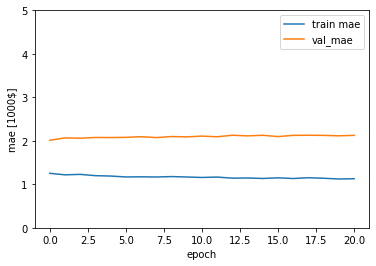

In [49]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.ylabel('mae [1000$]')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

評価

In [50]:
test_loss, test_mae = model.evaluate(n_test_data, test_labels)
print('loss: {:.3f}\n mae: {:.3f}'.format(test_loss, test_mae))

4/4 [==============================] - 0s 2ms/step - loss: 15.3463 - mae: 2.5848
loss: 15.346
 mae: 2.585


推論

In [51]:
print(np.round(test_labels[0:10]))

test_predictions = model.predict(n_test_data[0:10]).flatten()
print(np.round(test_predictions))

[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
[ 8. 20. 22. 32. 26. 23. 27. 23. 19. 22.]
